# Clústering con Python

#### Importar el dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
# Dataset de vinos tintos
df = pd.read_csv(r'F:\BD\GitHub\mlearningcourse\datasets\wine\winequality-red.csv', sep = ';')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Importar un histograma

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

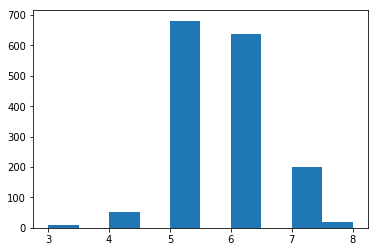

In [9]:
# Calidad del vino
plt.hist(df['quality'])

In [10]:
# Promedio de los compuestos químicos por calidad

df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [12]:
# Todos los valores se convierten en un valor entre cero y uno

df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clústering jerárquico con Scikit-learn

In [14]:
# Una vez importado el paquete AgglomerativeClustering
                                # Se indica que se requieren 6 clústers
                                # Se indica que se utilizará el método de >>ward<< para calcular distancias
                                # Se indica cual data set se agrupará en clústers (df_norm)
clus = AgglomerativeClustering(n_clusters = 6, linkage = 'ward').fit(df_norm)

In [58]:
# Se crea una serie de datos, dónde se muestra el índice, y el clúster al que pertenece
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del clúster')

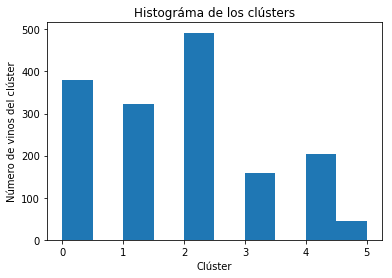

In [59]:
# Generar un histograma con la serie creada anteriormente
plt.hist(md_h)
plt.title('Histográma de los clústers')
plt.xlabel('Clúster')
plt.ylabel('Número de vinos del clúster')

In [20]:
# Hijos del clúster
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

### Calcular distancias con el método de Ward para crear el dendrograma

In [23]:
Z = linkage(df_norm, method= 'ward')

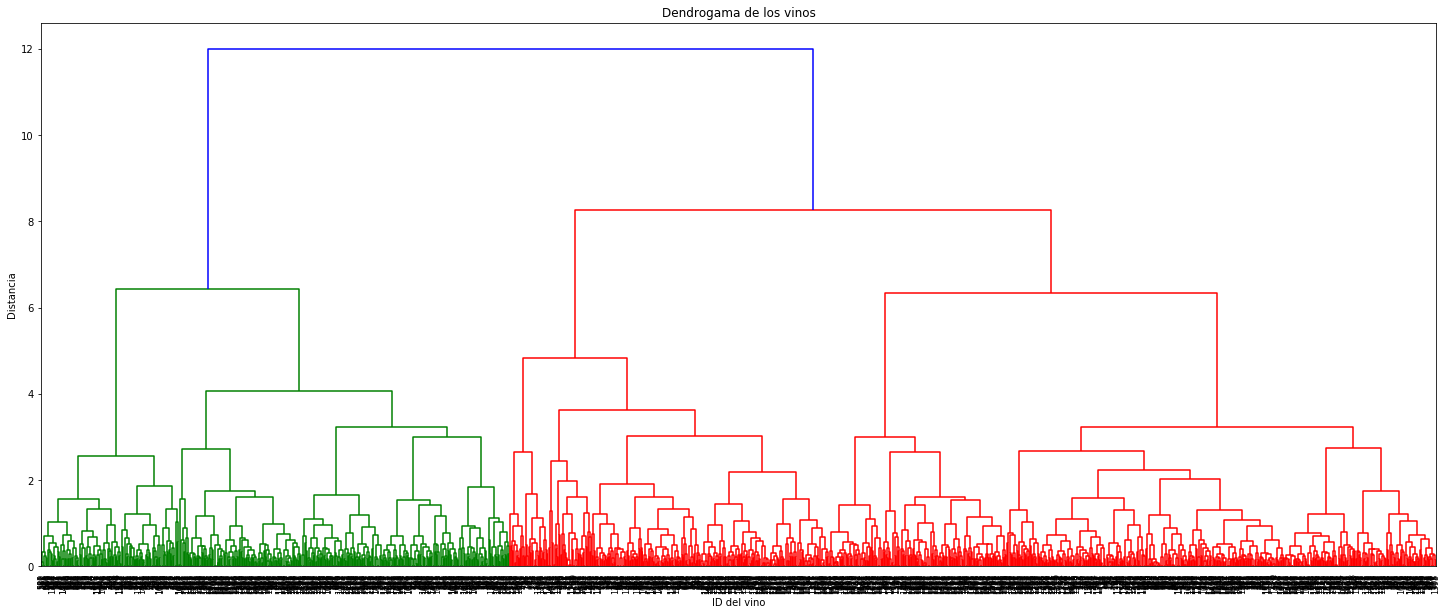

In [24]:
plt.figure(figsize = (25,10))
plt.title('Dendrogama de los vinos')
plt.xlabel('ID del vino')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation= 90., leaf_font_size=8.)
plt.show()

In [52]:
def dendrogram_tune(*args, **kwargs):
    max_d= kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs )
#     print(ddata)
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerarquico con dendrograma truncado')
        plt.xlabel('Indice del dataset (o tamaño del cluster)')
        plt.ylabel('Distancia')
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1]
            if y> annotate_above:
                plt.plot(x, y, 'o', c = color)
                plt.annotate('%.3g'%y, (x,y), xytext = (0,-5), textcoords = 'offset points',
                            va = 'top', ha = 'center')
                
    if max_d: 
        plt.axhline(y= max_d, c = 'k')
    return ddata

In [47]:
# import nbimporter
# from Functions import dendrogram_tune

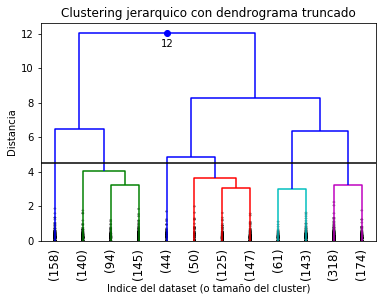

In [53]:
# Función para construir dendrograma
    # truncate_mode ---> Trunca el dendrograma con los últimos registros (P), que en este caso vale 12
    # p --> número de registros a mostrar
    # leaf_rotation ---> Para mostrar las etiquetas en vertical
    # leaf_font_size ---> Para asignar el tamaño de fuente
    # show_contracted ----> True para contraer los brazos del dendrograma
    # annotate_above ---> Para mostrar las etiquetas de las distancias
    # max_d ---> pinta una línea que cruza el dendrograma en la distancia indicada y cambia de color los clústers

dendrogram_tune(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12.,
                show_contracted = True, annotate_above = 10, max_d = 4.5)
plt.show()

## Clústering con K-means

In [26]:
from sklearn.cluster import KMeans
from sklearn import datasets

#### Crear el modelo

In [54]:
# Crea el modelo de k-means con los valores normalizados
model = KMeans(n_clusters = 6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# A que categoría pertenece cada uno de los vinos
model.labels_

array([0, 0, 0, ..., 5, 5, 1])

In [60]:
# Generar una serie con los clústers de k-means
md_k = pd.Series(model.labels_)

In [61]:
# Agregar dos columnas al dataset
df_norm['clust_h'] = md_h
df_norm['clust_k'] = md_k
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0


(array([504.,   0., 274.,   0., 321.,   0.,  30.,   0., 248., 222.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

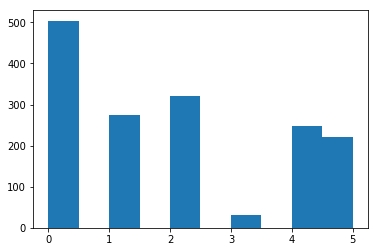

In [62]:
# Histograma de k-means
plt.hist(md_k)

In [63]:
# Centroides
model.cluster_centers_

array([[0.26262467, 0.36039764, 0.11722222, 0.09154843, 0.12251901,
        0.1448273 , 0.10677828, 0.49058195, 0.48767342, 0.15497576,
        0.22096561, 0.44087302],
       [0.36202442, 0.16017148, 0.41905109, 0.10378962, 0.10596127,
        0.1598643 , 0.08302597, 0.41531882, 0.42059888, 0.23565278,
        0.47894441, 0.69124088],
       [0.31665426, 0.27896556, 0.30339564, 0.15121837, 0.12697694,
        0.37742969, 0.2954658 , 0.53959954, 0.43675031, 0.17865204,
        0.21321192, 0.45358255],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.17380212, 0.32327533, 0.09274775, 0.09397754, 0.095685  ,
        0.2534894 , 0.12677872, 0.32195962, 0.57884656, 0.18600637,
        0.49226149,

In [64]:
# Coeficiente de inercia del modelo 

model.inertia_

186.54571440899758

## Interpretación final

In [65]:
df_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.262625,0.360398,0.117222,0.091548,0.122519,0.144827,0.106778,0.490582,0.487673,0.154976,0.220966,0.440873,2.029762
1,0.362024,0.160171,0.419051,0.103790,0.105961,0.159864,0.083026,0.415319,0.420599,0.235653,0.478944,0.691241,0.135036
2,0.316654,0.278966,0.303396,0.151218,0.126977,0.377430,0.295466,0.539600,0.436750,0.178652,0.213212,0.453583,1.052960
3,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667,4.900000
4,0.582429,0.205797,0.511976,0.134004,0.131180,0.139085,0.091830,0.655964,0.331947,0.222499,0.291853,0.547581,2.036290
5,0.173802,0.323275,0.092748,0.093978,0.095685,0.253489,0.126779,0.321960,0.578847,0.186006,0.492261,0.612613,3.450450


# Dataset de prueba propia (Clustering)

#### Importación del dataset

In [76]:
# Dataset de vinos tintos
df_p = pd.read_csv(r'F:\BD\GitHub\mlearningcourse\datasets\wine\winequality-red.csv', sep = ';')
print(df_p.shape)
df_p.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Crear histogramas para identificar patrones de distribución


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

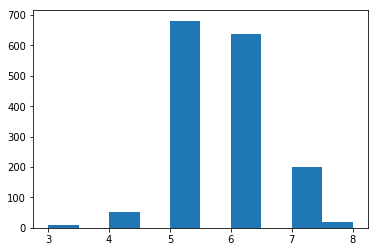

In [78]:
# Crear diferentes gráficos en esta sección (múltiple plots)

plt.hist(df_p['quality'])

#### Selección de columnas para construír los clústers
* Se crea un nuevo dataframe

In [123]:
data = df_p[['residual sugar','fixed acidity', 'citric acid']].values

#### Importar paquete AgglomerativeClustering para calcular las distancias y ajustar el modelo seleccionando el dataset
* El modelo se declara dentro de la función "fit"
* "num_cluster" representa la cantidad de clúster que buscamos construir
* Linkaged es el método que se utiliza para calcular las distancias

In [124]:
num_cluster = 3
clusters = AgglomerativeClustering(n_clusters = num_cluster , 
                                   linkage = 'ward').fit(data)

#### Se construye una serie con las *etiquetas* del clúster para cada observación

In [125]:
md_herarc = pd.Series(clusters.labels_)

#### Se construye un diagráma de dispersión, y se utilizan tantos colores, como número de etiquetas del clúster
* "c" representa la propiedad "color", y "cluster.labels_" la cantidad de colores a combinar en función a las etiquetas creadas anteriormente

Text(0.5, 0, '1a_columna')

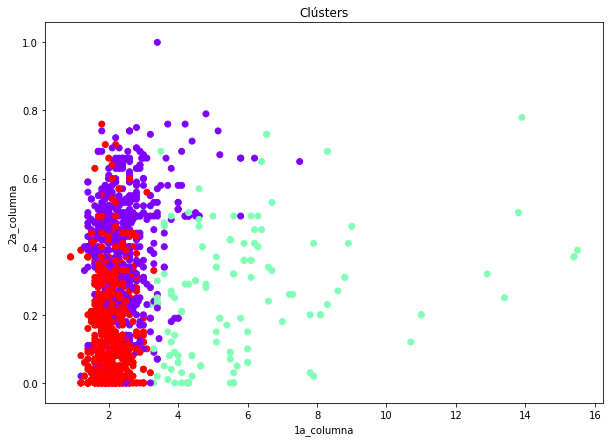

In [138]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0],data[:,2], #<---- Se indican las columnas del dataset
            c=clusters.labels_, 
            cmap='rainbow')  
plt.title('Clústers')
plt.ylabel('2a_columna')
plt.xlabel('1a_columna')

#### Se crea una columna nueva en el dataframe original, con la etiqueta de los clústers
* Ordenamos el dataframe en forma descendente, utilizando la columna creada ('cluster')

In [139]:
df_p['cluster'] = md_herarc
df_p.sort_values('cluster', ascending = False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1209,6.2,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,7,2
546,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6,2
1229,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5,2
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,2


#### Construcción del dendrogama
* Se utiliza el dataframe creado con la selección de columnas a "clusterizar"

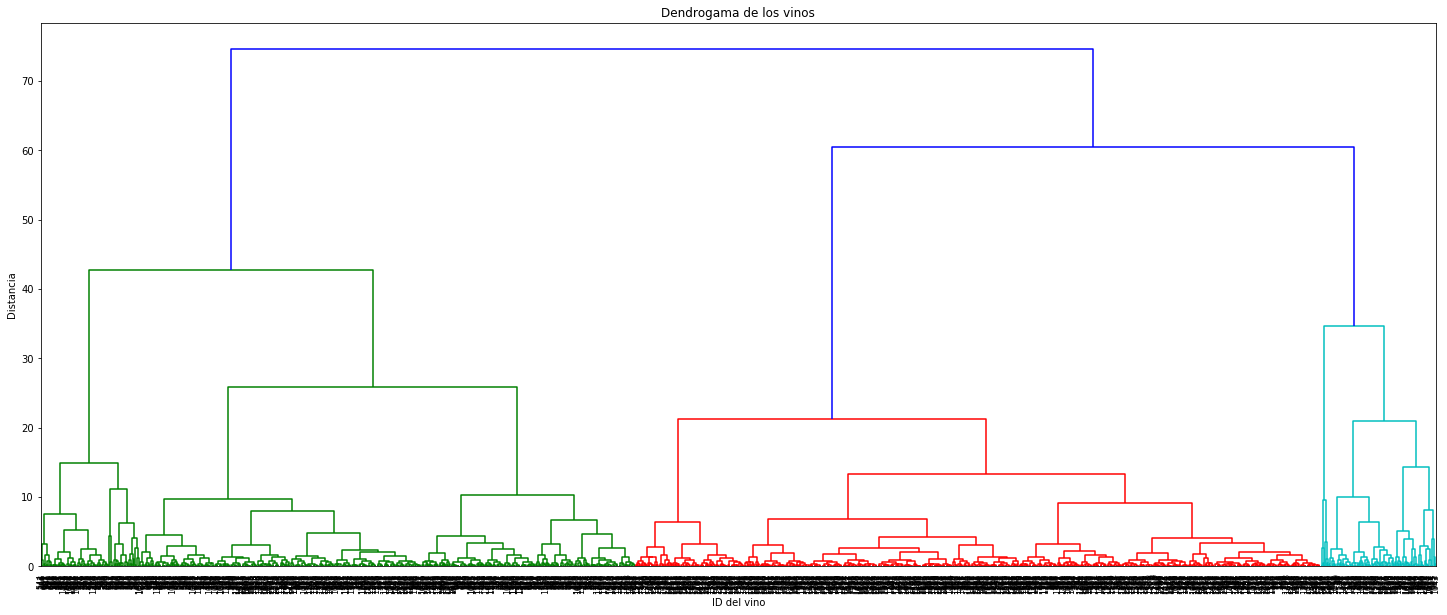

In [140]:
Z = linkage(data, method= 'ward')
plt.figure(figsize = (25,10))
plt.title('Dendrogama de los vinos')
plt.xlabel('ID del vino')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation= 90., leaf_font_size=8.)
plt.show()